In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import Callback
import imghdr
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image

C:\Users\princ\AppData\Local\Temp\ipykernel_27488\1616477863.py:11: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


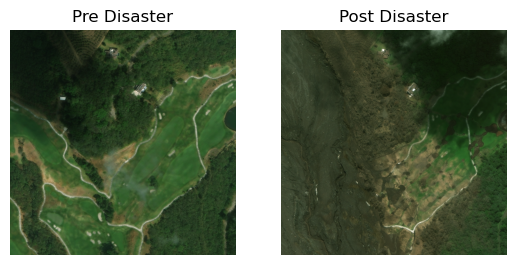

In [2]:
data = "D:\\test\\images"
out = os.listdir(data)
pre_path = os.path.join(data,out[0])
post_path = os.path.join(data,out[1])

pre = mpimg.imread(pre_path)
post = mpimg.imread(post_path)

fig, axes = plt.subplots(1, 2)

axes[1].imshow(pre)
axes[0].set_title('Pre Disaster')
axes[0].imshow(post)
axes[1].set_title('Post Disaster')

for ax in axes:
    ax.axis('off')

plt.show()

In [3]:
image_path = os.path.join(data,out[0])
base_name, extension = os.path.splitext(image_path)
extension = extension.lower()

print("Base name:", base_name)
print("Extension:", extension)
if extension in ['.jpeg', '.jpg', '.bmp', '.png']:
    print("This is an image file.")
else:
    print("This is not an image file.")

Base name: D:\test\images\guatemala-volcano_00000003_post_disaster
Extension: .png
This is an image file.


In [4]:
data_dir = "D:\\test"
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
num_classes = len(os.listdir(data_dir))
num_obs = [0] * num_classes

try:
    for class_idx, image_class in enumerate(os.listdir(data_dir)):
        class_dir = os.path.join(data_dir, image_class)
        if not os.path.isdir(class_dir):
            print("Skipping non-directory:", class_dir)
            continue
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            print("Processing:", image_path)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
                else:
                    num_obs[class_idx] += 1
            except Exception as e:
                print('Issue with image {}: {}'.format(image_path, str(e)))
except Exception as ex:
    print("Error:", ex)

Processing: D:\test\images\guatemala-volcano_00000003_post_disaster.png
Processing: D:\test\images\guatemala-volcano_00000003_pre_disaster.png
Processing: D:\test\images\guatemala-volcano_00000005_post_disaster.png
Processing: D:\test\images\guatemala-volcano_00000005_pre_disaster.png
Processing: D:\test\images\guatemala-volcano_00000009_post_disaster.png
Processing: D:\test\images\guatemala-volcano_00000009_pre_disaster.png
Processing: D:\test\images\guatemala-volcano_00000011_post_disaster.png
Processing: D:\test\images\guatemala-volcano_00000011_pre_disaster.png
Processing: D:\test\images\guatemala-volcano_00000021_post_disaster.png
Processing: D:\test\images\guatemala-volcano_00000021_pre_disaster.png
Processing: D:\test\images\hurricane-florence_00000004_post_disaster.png
Processing: D:\test\images\hurricane-florence_00000004_pre_disaster.png
Processing: D:\test\images\hurricane-florence_00000005_post_disaster.png
Processing: D:\test\images\hurricane-florence_00000005_pre_disaster

In [5]:
data1 = keras.utils.image_dataset_from_directory(data_dir)

Found 1866 files belonging to 1 classes.


In [6]:
le = len(os.listdir(data))
le

1866

In [7]:
l = []
for i in os.listdir(data):
    image_paths = os.path.join(data,i)
    l.append(image_paths)
l

['D:\\test\\images\\guatemala-volcano_00000003_post_disaster.png',
 'D:\\test\\images\\guatemala-volcano_00000003_pre_disaster.png',
 'D:\\test\\images\\guatemala-volcano_00000005_post_disaster.png',
 'D:\\test\\images\\guatemala-volcano_00000005_pre_disaster.png',
 'D:\\test\\images\\guatemala-volcano_00000009_post_disaster.png',
 'D:\\test\\images\\guatemala-volcano_00000009_pre_disaster.png',
 'D:\\test\\images\\guatemala-volcano_00000011_post_disaster.png',
 'D:\\test\\images\\guatemala-volcano_00000011_pre_disaster.png',
 'D:\\test\\images\\guatemala-volcano_00000021_post_disaster.png',
 'D:\\test\\images\\guatemala-volcano_00000021_pre_disaster.png',
 'D:\\test\\images\\hurricane-florence_00000004_post_disaster.png',
 'D:\\test\\images\\hurricane-florence_00000004_pre_disaster.png',
 'D:\\test\\images\\hurricane-florence_00000005_post_disaster.png',
 'D:\\test\\images\\hurricane-florence_00000005_pre_disaster.png',
 'D:\\test\\images\\hurricane-florence_00000007_post_disaster.png

In [8]:
label = "post"
labels = []
for i, path in enumerate(l):
    if i%2==0:
        label = "post"
        labels.append(label)
    else:
        label = "pre"
        labels.append(label)
    print(f"{label}: {path}")

post: D:\test\images\guatemala-volcano_00000003_post_disaster.png
pre: D:\test\images\guatemala-volcano_00000003_pre_disaster.png
post: D:\test\images\guatemala-volcano_00000005_post_disaster.png
pre: D:\test\images\guatemala-volcano_00000005_pre_disaster.png
post: D:\test\images\guatemala-volcano_00000009_post_disaster.png
pre: D:\test\images\guatemala-volcano_00000009_pre_disaster.png
post: D:\test\images\guatemala-volcano_00000011_post_disaster.png
pre: D:\test\images\guatemala-volcano_00000011_pre_disaster.png
post: D:\test\images\guatemala-volcano_00000021_post_disaster.png
pre: D:\test\images\guatemala-volcano_00000021_pre_disaster.png
post: D:\test\images\hurricane-florence_00000004_post_disaster.png
pre: D:\test\images\hurricane-florence_00000004_pre_disaster.png
post: D:\test\images\hurricane-florence_00000005_post_disaster.png
pre: D:\test\images\hurricane-florence_00000005_pre_disaster.png
post: D:\test\images\hurricane-florence_00000007_post_disaster.png
pre: D:\test\images

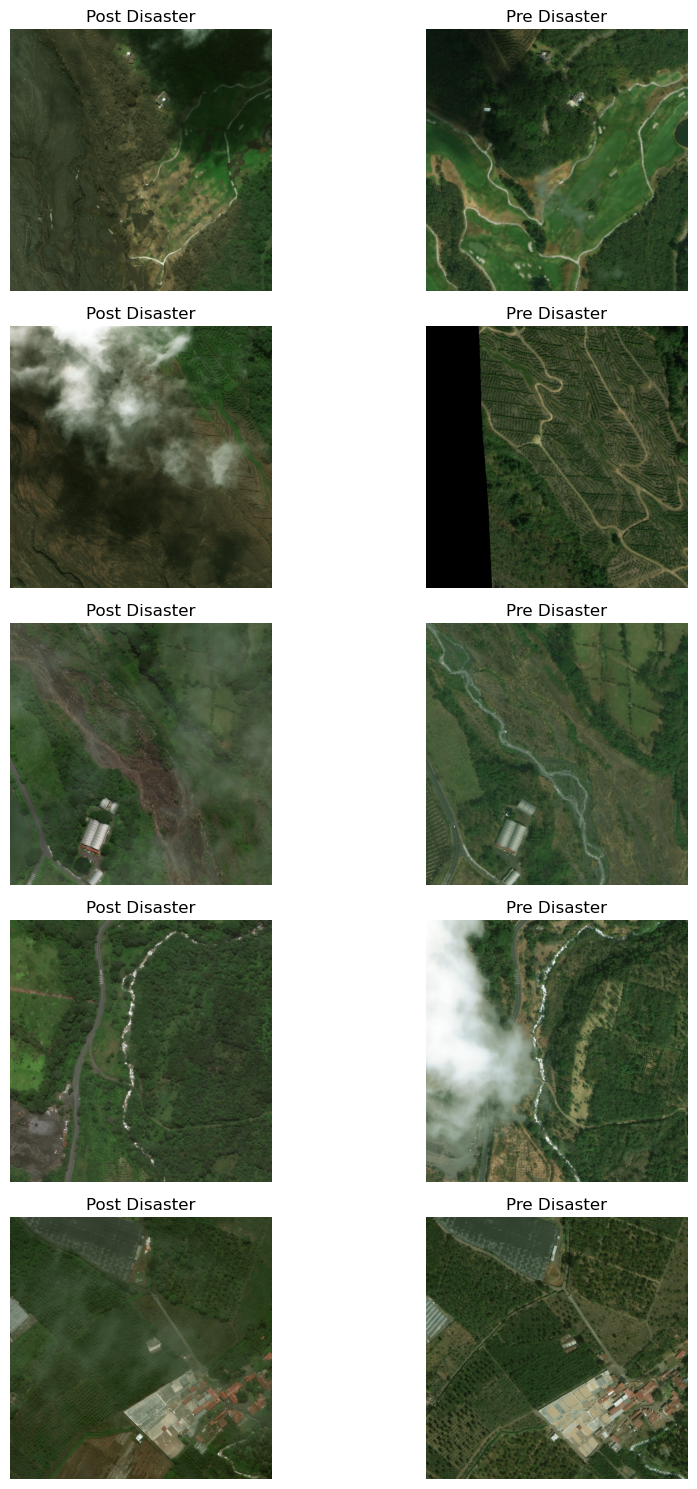

In [9]:
i = 0
fig, axs = plt.subplots(5, 2, figsize=(10, 15))
for x in l[:10]:
    if i % 2 == 0:
        label = "Post Disaster"
    else:
        label = "Pre Disaster"
    r = mpimg.imread(x)
    row = i // 2
    col = i % 2
    
    axs[row, col].imshow(r)
    axs[row, col].set_title(label)
    axs[row, col].axis('off')
    i = i + 1

plt.tight_layout()
plt.show()

In [10]:
target_size = (48, 48)
images = []

for path in l:
    try:
        img = load_img(path, target_size=target_size)
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
    except Exception as e:
        print(f"Error processing image '{path}': {e}")
images = np.array(images)

In [11]:
images

array([[[[0.2627451 , 0.30980393, 0.21960784],
         [0.24313726, 0.28627452, 0.20392157],
         [0.20784314, 0.2509804 , 0.16862746],
         ...,
         [0.07450981, 0.11764706, 0.05882353],
         [0.16470589, 0.22352941, 0.13725491],
         [0.1882353 , 0.2509804 , 0.16862746]],

        [[0.24705882, 0.28627452, 0.2       ],
         [0.27058825, 0.31764707, 0.22745098],
         [0.22352941, 0.27058825, 0.18039216],
         ...,
         [0.07843138, 0.10980392, 0.05098039],
         [0.07843138, 0.12156863, 0.05882353],
         [0.09411765, 0.13725491, 0.07450981]],

        [[0.23529412, 0.28627452, 0.19607843],
         [0.20392157, 0.25490198, 0.16862746],
         [0.19215687, 0.24705882, 0.16078432],
         ...,
         [0.05882353, 0.09411765, 0.04313726],
         [0.07058824, 0.10196079, 0.04705882],
         [0.16078432, 0.22352941, 0.14117648]],

        ...,

        [[0.27450982, 0.30980393, 0.21960784],
         [0.25490198, 0.2901961 , 0.20392157]

In [12]:
label_mapping = {'post': 0, 'pre': 1}  
numeric_labels = [label_mapping[label] for label in labels]

In [13]:
class Callback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.99:  
            print("\nHurrah! We reached the goal. So sorry to say that its time to stop.")
            self.model.stop_training = True

In [14]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = "relu", input_shape = (48,48,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

callbacks = Callback()

history = model.fit(images,np.array(numeric_labels),epochs = 100,callbacks = [callbacks],batch_size = 40)

history

Epoch 1/100


C:\Users\princ\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5262 - loss: 0.6932
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4822 - loss: 0.6934
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5059 - loss: 0.6931
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5158 - loss: 0.6929
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5084 - loss: 0.6929
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5094 - loss: 0.6929
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5282 - loss: 0.6924
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5052 - loss: 0.6927
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5108 - loss: 0.6918
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5082 - loss: 0.6936
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5284 - loss: 0.6916
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy:

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,453 (361.15 KB)

 Trainable params: 30,817 (120.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,636 (240.77 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


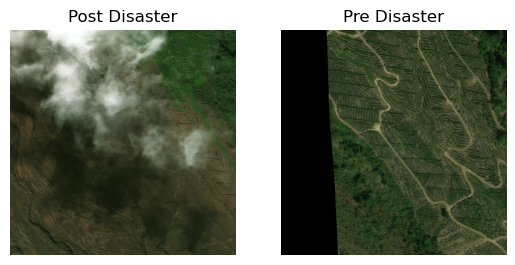

In [23]:
if False:
    print("Please provide exactly two image paths.")
else:
    path1 = l[2]
    new_img = load_img(path1, target_size=(48, 48))
    new_img_array = img_to_array(new_img) / 255.0
    new_img_array = np.expand_dims(new_img_array, axis=0)
    path2 = l[3]
    new_img1 = load_img(path2, target_size=(48, 48))
    new_img_array1 = img_to_array(new_img1) / 255.0
    new_img_array1 = np.expand_dims(new_img_array1, axis=0)

    p1 = model.predict(new_img_array)
    p2 = model.predict(new_img_array1)
    if p1 > 0.5:
        label1 = "Pre Disaster"
    else:
        label1 = "Post Disaster"

    if p2 > 0.5:
        label2 = "Pre Disaster"
    else:
        label2 = "Post Disaster"
    img1 = mpimg.imread(path1)
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title(label1)
    plt.axis("off")
    img2 = mpimg.imread(path2)
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title(label2)
    plt.axis("off")

    plt.show()

In [24]:
bi = cv2.imread(path1)
ai = cv2.imread(path2)

bg = cv2.cvtColor(bi, cv2.COLOR_BGR2GRAY)
ag = cv2.cvtColor(ai, cv2.COLOR_BGR2GRAY)

diff_image = cv2.absdiff(bg, ag)

_, thresholded_diff = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
thresholded_diff_color = cv2.merge([thresholded_diff, thresholded_diff, thresholded_diff])

color_map = cv2.applyColorMap(thresholded_diff, cv2.COLORMAP_JET)
blended_image = cv2.addWeighted(bi, 1, color_map, 0.5, 0)

cv2.imshow('Blended Image', blended_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

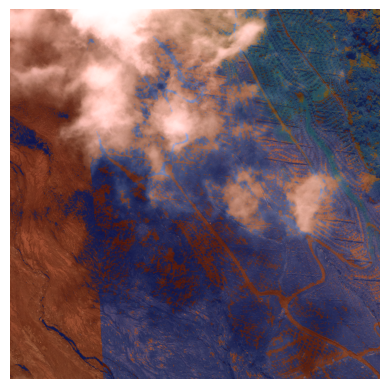

In [25]:
blended_image_rgb = cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB)
plt.imshow(blended_image_rgb)
plt.axis('off')
plt.show()

In [26]:
num_changed_pixels = cv2.countNonZero(thresholded_diff)
total_pixels = bi.shape[0] * bi.shape[1]
percentage_difference = (num_changed_pixels / total_pixels) * 100

print("Damage occured", percentage_difference)

Damage occured 50.329017639160156
